# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of 150 samples of iris flowers, each belonging to one of three species: Iris setosa, Iris versicolor, and Iris virginica. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

##### Target Variable:
- **Species**: The species of the iris flower, which can take one of the following values:
  - 0: Iris setosa
  - 1: Iris versicolor
  - 2: Iris virginica

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [8]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Bind the disease progression (diabetes target) to the DataFrame
iris_df['species'] = iris_data.target


# Display the DataFrame
print(iris_df)

# Number of observations (rows)
num_observations = iris_df.shape[0]
print(f"Number of observations: {num_observations}")

# Number of variables (columns)
num_variables = iris_df.shape[1]
print(f"Number of variables: {num_variables}")

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

#### **Question 2:** 
#### Data-visualization

Create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


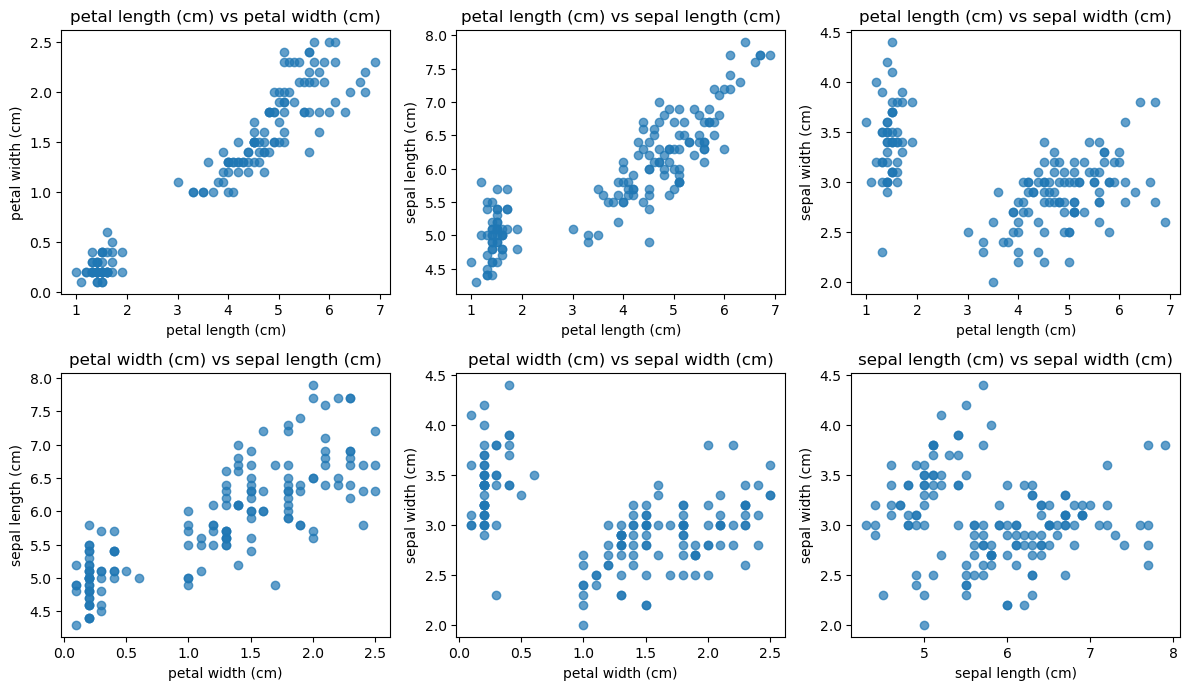

In [10]:
# Get feature names
feature_names = iris_df.columns.difference(['species'])

# Create a figure for the scatter plots
plt.figure(figsize=(12, 10))

# Counter for subplot index
plot_number = 1

# Loop through each pair of features
for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
        plt.scatter(iris_df[feature_names[i]], iris_df[feature_names[j]], alpha=0.7)
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.title(f'{feature_names[i]} vs {feature_names[j]}')
        
        # Increment the plot number
        plot_number += 1

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### **Question 3:** 
#### Data cleaning

In [12]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (excluding the species column)
scaled_features = scaler.fit_transform(iris_df.iloc[:, :-1])

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Add the species column back to the scaled DataFrame
scaled_iris_df['species'] = iris_df['species'].values

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

> Standardizing features is essential for effective clustering. It ensures that all features are treated equally, leading to more accurate and interpretable results. Not standardizing can result in misleading insights and ineffective analysis.  

> Clustering relies on measuring distances between data points. Standardization ensures that these distances accurately reflect similarities across all features, not just those with larger values.

#### **Question 4:** 
#### K-means clustering 
Apply the K-Means clustering algorithm to the Iris dataset.
Choose the number of clusters (K=3, since there are three species) and fit the model.
Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [26]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=12345)  # Specify the number of clusters
clusters = kmeans.fit(scaled_features)
# Add cluster labels to the original DataFrame
scaled_iris_df['Cluster'] = clusters.labels_


# Create a contingency table of species vs clusters
species_cluster_table = pd.crosstab(scaled_iris_df['species'], scaled_iris_df['Cluster'], 
                                      rownames=['Species'], colnames=['Cluster'])

# Display the table
print(species_cluster_table)

# Remap clusters if needed based on your findings
# Here, we swap cluster 0 and 1 as an example
cluster_remap = {0: 1, 1: 0, 2: 2}  # Modify this based on your analysis
scaled_iris_df['Mapped_Cluster'] = scaled_iris_df['Cluster'].map(cluster_remap)

# Create a new contingency table with mapped clusters
mapped_species_cluster_table = pd.crosstab(scaled_iris_df['species'], scaled_iris_df['Mapped_Cluster'], 
                                            rownames=['Species'], colnames=['Cluster'])

print(mapped_species_cluster_table)

Cluster   0   1   2
Species            
0         0  50   0
1        38   0  12
2        14   0  36
Cluster   0   1   2
Species            
0        50   0   0
1         0  38  12
2         0  14  36


/Users/juliagallucci/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Discuss the results of the K-Means clustering. How well did the clusters match the true species?

> Overall, the K-Means clustering results show a strong performance for species 0, but there is room for improvement in distinguishing between species 1 and species 2. 

#### **Question 5:** 
#### Bootstrapping 

 Implement bootstrapping on the mean of one of the sepal or petal measurement variables (e.g., Sepal Length, Petal Width) to assess the stability of the mean estimate. Generate 1000 bootstrap samples, calculate the mean for each sample, and compute a 95% confidence interval to evaluate the variability in the estimate.

In [67]:
# Calculate the mean of the Sepal Length
sepal_length_mean = iris_df['sepal length (cm)'].mean()

# Display the result
print(f"Mean of Sepal Length: {sepal_length_mean:.2f}")

np.random.seed(123)
# Initialize an empty list to store the bootstrap samples
bootstrap_samples = []

for i in range(1000):
    sample = iris_df.drop(columns='species').sample(frac=1, replace=True)
    sample = sample.assign(replicate=i)  # Add replicate number
    bootstrap_samples.append(sample)  # Store the sample

# Combine all bootstrap samples into one DataFrame
boot1000 = pd.concat(bootstrap_samples)

# Calculate the mean price for each bootstrap sample (replicate)
boot_means = boot1000.groupby('replicate')['sepal length (cm)'].mean().reset_index(name='sepal length (cm)')
boot_means


# Calculate the 95% confidence interval bounds (2.5th and 97.5th percentiles) for the mean price
ci_bounds = boot_means["sepal length (cm)"].quantile([0.025, 0.975])

# Display the result
print(f"95% Confidence Interval of Mean Sepal Length: ({ci_bounds.iloc[0]:.2f}, {ci_bounds.iloc[1]:.2f})")


Mean of Sepal Length: 5.84
95% Confidence Interval of Mean Sepal Length: (5.72, 5.98)


Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the selected variable appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> Point Estimate: The sample mean of Sepal Length is 5.84
95% Confidence Interval: We estimate that the true mean of Sepal Length is between 5.72 and 5.98

Based on the bootstrapping results for Sepal Length in the Iris dataset, the bootstrapped mean distribution was narrow, and the 95% confidence interval was small, suggesting that the sample mean is a stable and reliable estimate of the true  mean.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
